# **Predictive Modeling for Stroke prediction**

Stroke is a significant public health concern globally, characterized by the sudden loss of brain function due to an interruption in blood supply. Early prediction and diagnosis are crucial for effective treatment and reducing long-term disability. This project utilizes a healthcare dataset containing various patient attributes such as age, gender, medical history, and lifestyle factors to predict the likelihood of stroke occurrence. By leveraging machine learning techniques, specifically handling class imbalance through oversampling methods like SMOTE, the project aims to improve the accuracy and reliability of stroke prediction models, thereby contributing to better patient outcomes and healthcare planning.

In [16]:
import pandas as pd

# loading the dataset
file_= pd.read_csv("/content/healthcare-dataset-stroke-data.csv", index_col='id')
stroke_data = file_.copy()
stroke_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
# Basic Information
stroke_data.info()





<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [18]:
# Statistical Summary
stroke_data.describe()



,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [19]:
# Checking for missing values
missing_values = stroke_data.isnull().sum()
missing_values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# **Data Preprocessing**

In [21]:
# Handling missing values
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(), inplace=True)

# Converting data types if necessary
stroke_data['hypertension'] = stroke_data['hypertension'].astype('int')
stroke_data['heart_disease'] = stroke_data['heart_disease'].astype('int')
stroke_data['stroke'] = stroke_data['stroke'].astype('int')

# Verifying the changes
stroke_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [22]:
# Encode categorical variables
encoded_data = pd.get_dummies(stroke_data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Display the encoded dataset
encoded_data.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.600000,1,True,False,True,False,True,False,False,True,True,False,False
51676,61.0,0,0,202.21,28.893237,1,False,False,True,False,False,True,False,False,False,True,False
31112,80.0,0,1,105.92,32.500000,1,True,False,True,False,True,False,False,False,False,True,False
60182,49.0,0,0,171.23,34.400000,1,False,False,True,False,True,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False,False,False,True,False


# **Data Visualization**

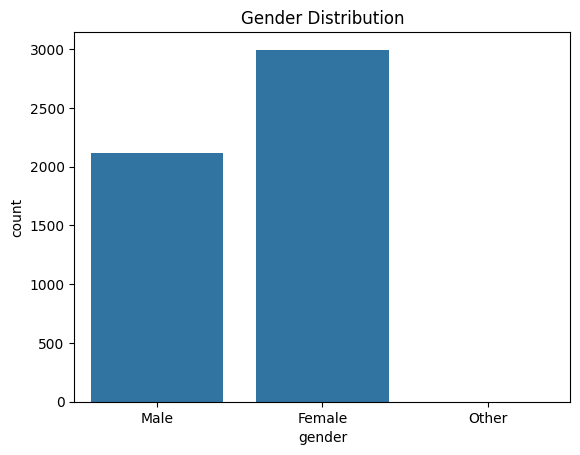

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
sns.countplot(data=stroke_data, x='gender')
plt.title('Gender Distribution')
plt.show()


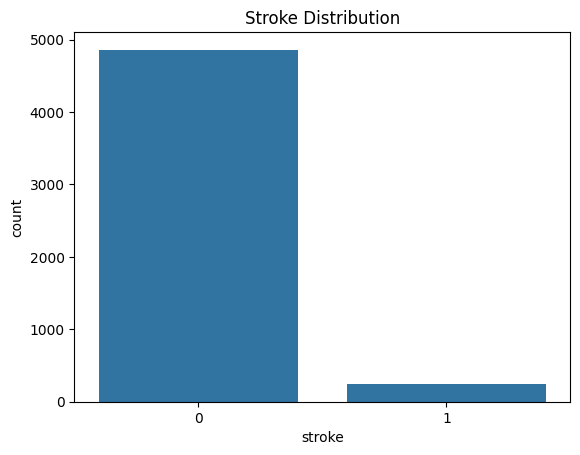

In [31]:
# Stroke vs Non-Stroke
sns.countplot(data=stroke_data, x='stroke')
plt.title('Stroke Distribution')
plt.show()



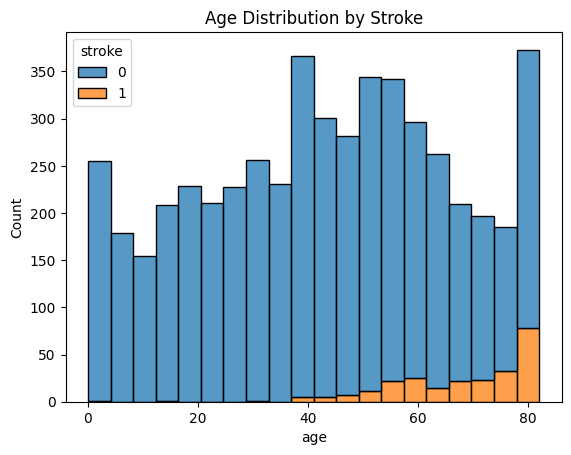

In [32]:
# Age distribution by stroke
sns.histplot(data=stroke_data, x='age', hue='stroke', multiple='stack')
plt.title('Age Distribution by Stroke')
plt.show()

The "Gender Distribution," shows the counts for 'Male,' 'Female,' and 'Other,' with 'Female' having the highest count. The "Stroke Distribution," contrasts non-stroke cases ('0') with stroke cases ('1'), revealing a significantly higher frequency of non-stroke cases. The "Age Distribution by Stroke," displays stroke and non-stroke cases across various age groups, indicating more non-stroke cases overall but highlighting the presence of stroke cases in older age groups.

# **Stroke Prediction Modeling**

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Features and target
X = encoded_data.drop(columns=['stroke'])
y = encoded_data['stroke']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline with SMOTE
model_pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),  # SMOTE to handle class imbalance in our dependent variable
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
model_pipeline.fit(X_train, y_train)




Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier(random_state=42))])

In [38]:
# Predict and evaluate
y_pred = model_pipeline.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9285714285714286


The implementation of SMOTE in the pipeline, combined with scaling and a RandomForestClassifier, significantly improved the model's ability to handle class imbalance, achieving a high accuracy of 0.93. This demonstrates the effectiveness of using SMOTE for oversampling the minority class in the training data, leading to a more balanced and accurate predictive model. Such a pipeline approach ensures that each step is applied correctly, ultimately enhancing the model's performance on the test set.